# onderzoeksvragen:

 - In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB zelf?
 - welke kenmerken van een film bepalen de imdb score?
 - Welke genres zijn over de loop van de jaren populairder geworden?
 - In hoeverre heeft de release date van een sequel invloed om de IMDB score van die sequel?


In [1]:
# importeren van libaries.
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import altair as alt
import csv
import seaborn as sns

In [2]:
# test om het bestand te lezen
df_1_not_cleaned = pd.read_csv('moviedataset.csv')
# head eerste 5 regels van het bestand
df_1_cleaned = df_1_not_cleaned.dropna(axis=0, how='any')
df_1_cleaned.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [3]:
# data cleaning dataset 1
data_1 = df_1_cleaned.drop(["color", "plot_keywords", "aspect_ratio", "movie_imdb_link", "actor_2_facebook_likes", "actor_1_facebook_likes", "actor_3_facebook_likes", "country"], axis=1)
dataset_1 = data_1.reindex(columns= ['movie_title', 'imdb_score', 'title_year', 'duration','genres', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'movie_facebook_likes', 'director_facebook_likes', 'cast_total_facebook_likes', 'content_rating', 'num_user_for_reviews', 'language'])
# De Blank spaces van de data veravangen met none
dataset_1.head()

,movie_title,imdb_score,title_year,duration,genres,director_name,actor_1_name,actor_2_name,actor_3_name,movie_facebook_likes,director_facebook_likes,cast_total_facebook_likes,content_rating,num_user_for_reviews,language
0,Avatar,7.9,2009.0,178.0,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,33000,0.0,4834,PG-13,3054.0,English
1,Pirates of the Caribbean: At World's End,7.1,2007.0,169.0,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,0,563.0,48350,PG-13,1238.0,English
2,Spectre,6.8,2015.0,148.0,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,85000,0.0,11700,PG-13,994.0,English
3,The Dark Knight Rises,8.5,2012.0,164.0,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,164000,22000.0,106759,PG-13,2701.0,English
5,John Carter,6.6,2012.0,132.0,Action|Adventure|Sci-Fi,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,24000,475.0,1873,PG-13,738.0,English


In [4]:
# tabel die statistische weergaven geeft van de numerieke data van dataset 1
dataset_1.describe()

,imdb_score,title_year,duration,movie_facebook_likes,director_facebook_likes,cast_total_facebook_likes,num_user_for_reviews
count,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000
mean,6.465282,2002.976571,110.257987,9353.829340,807.336528,11527.101970,336.843184
std,1.056247,9.888108,22.646717,21462.889123,3068.171683,19122.176905,411.227368
min,1.600000,1927.000000,37.000000,0.000000,0.000000,0.000000,4.000000
25%,5.900000,1999.000000,96.000000,0.000000,11.000000,1919.750000,110.000000
50%,6.600000,2004.000000,106.000000,227.000000,64.000000,4059.500000,210.000000
75%,7.200000,2010.000000,120.000000,11000.000000,235.000000,16240.000000,398.250000
max,9.300000,2016.000000,330.000000,349000.000000,23000.000000,656730.000000,5060.000000


In [5]:
# test om het bestand te lezen
df_2_not_cleaned = pd.read_csv("MoviesWithSequels.csv", encoding= 'unicode_escape') 
# head eerste 5 regels van het bestand
df_2_cleaned = df_2_not_cleaned.dropna(axis=0, thresh=2)
df_2_cleaned.head()

,Position,Const,Created,Modified,Description,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,1,tt0145487,03-11-2011,03-11-2011,NaN,Spider-Man,https://www.imdb.com/title/tt0145487/,movie,7.3,121.0,2002.0,"Action, Adventure, Sci-Fi",670777.0,30-04-2002,Sam Raimi
1,2,tt0316654,03-11-2011,03-11-2011,NaN,Spider-Man 2,https://www.imdb.com/title/tt0316654/,movie,7.3,127.0,2004.0,"Action, Adventure, Sci-Fi",528482.0,25-06-2004,Sam Raimi
2,3,tt0413300,03-11-2011,03-11-2011,NaN,Spider-Man 3,https://www.imdb.com/title/tt0413300/,movie,6.2,139.0,2007.0,"Action, Adventure, Sci-Fi",485814.0,03-04-2007,Sam Raimi
3,4,tt0133093,03-11-2011,03-11-2011,NaN,The Matrix,https://www.imdb.com/title/tt0133093/,movie,8.7,136.0,1999.0,"Action, Sci-Fi",1615984.0,24-03-1999,"Lilly Wachowski, Lana Wachowski"
4,5,tt0234215,03-11-2011,03-11-2011,NaN,The Matrix Reloaded,https://www.imdb.com/title/tt0234215/,movie,7.2,138.0,2003.0,"Action, Sci-Fi",502256.0,07-05-2003,"Lilly Wachowski, Lana Wachowski"


In [6]:
# data cleaning dataset 2
data_2 = df_2_cleaned.drop(['Const', 'Position', 'Created', 'Modified', 'Description', 'Title Type', 'URL', 'Year'], axis=1)
dataset_2 = data_2.reindex(columns= ['Title', 'IMDb Rating', 'Release Date', 'Runtime (mins)', 'Genres', 'Directors', 'Num Votes'])
dataset_2.head()

,Title,IMDb Rating,Release Date,Runtime (mins),Genres,Directors,Num Votes
0,Spider-Man,7.3,30-04-2002,121.0,"Action, Adventure, Sci-Fi",Sam Raimi,670777.0
1,Spider-Man 2,7.3,25-06-2004,127.0,"Action, Adventure, Sci-Fi",Sam Raimi,528482.0
2,Spider-Man 3,6.2,03-04-2007,139.0,"Action, Adventure, Sci-Fi",Sam Raimi,485814.0
3,The Matrix,8.7,24-03-1999,136.0,"Action, Sci-Fi","Lilly Wachowski, Lana Wachowski",1615984.0
4,The Matrix Reloaded,7.2,07-05-2003,138.0,"Action, Sci-Fi","Lilly Wachowski, Lana Wachowski",502256.0


In [7]:
# tabel die statistische weergaven geeft van de numerieke data van dataset 2
dataset_2.describe()

,IMDb Rating,Runtime (mins),Num Votes
count,1053.000000,1053.000000,1.053000e+03
mean,6.233428,105.039886,1.781977e+05
std,1.223566,19.299036,2.420719e+05
min,1.400000,21.000000,3.920000e+02
25%,5.500000,92.000000,2.680600e+04
50%,6.400000,101.000000,8.971700e+04
75%,7.100000,115.000000,2.254380e+05
max,9.200000,202.000000,2.220190e+06


In [8]:
# Find out what main genre is, then selects all movies with that main genre.
genres = dataset_1['genres'].values.tolist()
maingenres = []
for x in genres:
    if '|' in x:
        x = x.split('|')
        x = x[0]
    maingenres.append(x)


dataset_1['main_genre'] = maingenres

In [9]:
# data set voor onderzoekvraag 1
data_onderzoekvraag_1 = dataset_1.drop(['movie_title', 'title_year', 'duration', 'genres', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'content_rating', 'num_user_for_reviews', 'language'], axis=1)
data_onderzoekvraag_1.head()

,imdb_score,movie_facebook_likes,director_facebook_likes,cast_total_facebook_likes,main_genre
0,7.9,33000,0.0,4834,Action
1,7.1,0,563.0,48350,Action
2,6.8,85000,0.0,11700,Action
3,8.5,164000,22000.0,106759,Action
5,6.6,24000,475.0,1873,Action


In [10]:
# data set voor onderzoekvraag 2
data_onderzoekvraag_2 = dataset_1.drop(['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'movie_facebook_likes', 'director_facebook_likes', 'cast_total_facebook_likes', 'num_user_for_reviews'], axis=1)
data_onderzoekvraag_2.head()

,movie_title,imdb_score,title_year,duration,genres,content_rating,language,main_genre
0,Avatar,7.9,2009.0,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,English,Action
1,Pirates of the Caribbean: At World's End,7.1,2007.0,169.0,Action|Adventure|Fantasy,PG-13,English,Action
2,Spectre,6.8,2015.0,148.0,Action|Adventure|Thriller,PG-13,English,Action
3,The Dark Knight Rises,8.5,2012.0,164.0,Action|Thriller,PG-13,English,Action
5,John Carter,6.6,2012.0,132.0,Action|Adventure|Sci-Fi,PG-13,English,Action


In [11]:
# data set voor onderzoekvraag 3
data_onderzoekvraag_3_x = dataset_1.drop(['movie_title', 'duration', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'content_rating', 'language', 'genres'], axis=1)
data_onderzoekvraag_3 = data_onderzoekvraag_3_x[:5000]
data_onderzoekvraag_3.head()

,imdb_score,title_year,movie_facebook_likes,director_facebook_likes,cast_total_facebook_likes,num_user_for_reviews,main_genre
0,7.9,2009.0,33000,0.0,4834,3054.0,Action
1,7.1,2007.0,0,563.0,48350,1238.0,Action
2,6.8,2015.0,85000,0.0,11700,994.0,Action
3,8.5,2012.0,164000,22000.0,106759,2701.0,Action
5,6.6,2012.0,24000,475.0,1873,738.0,Action


In [12]:
# data set voor onderzoekvraag 4
data_onderzoekvraag_4 = dataset_2.drop(['Runtime (mins)', 'Genres', 'Directors', 'Num Votes'], axis=1)
data_onderzoekvraag_4.head()

,Title,IMDb Rating,Release Date
0,Spider-Man,7.3,30-04-2002
1,Spider-Man 2,7.3,25-06-2004
2,Spider-Man 3,6.2,03-04-2007
3,The Matrix,8.7,24-03-1999
4,The Matrix Reloaded,7.2,07-05-2003


### Onderzoeksvraag 3 uitwerkingen.

In [27]:
all_genres_duplicates = data_onderzoekvraag_3['main_genre'].values.tolist()
all_genres_once = []
for i in all_genres_duplicates: 
    if i not in all_genres_once: 
        all_genres_once.append(i) 
        
all_genres_once.sort()        
print(all_genres_once)

['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western']


In [15]:
all_years_duplicates = data_onderzoekvraag_3['title_year'].values.tolist()
all_years_once = []
for i in all_years_duplicates: 
    if i not in all_years_once:
        all_years_once.append(i) 
        
all_years_once = [round(x) for x in all_years_once]
all_years_once.sort()
print(all_years_once)

[1927, 1929, 1933, 1935, 1936, 1937, 1939, 1940, 1946, 1947, 1948, 1950, 1952, 1953, 1954, 1957, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


In [16]:
uitslag = []
for i in range(len(all_genres_once)):
    genre = all_genres_once[i]
    for i in range(len(all_years_once)):
        year = all_years_once[i]
        for i in range(len(all_years_once)):
                    x = data_onderzoekvraag_3.loc[(data_onderzoekvraag_3['main_genre'] == genre) & (data_onderzoekvraag_3['title_year'] == year)]
                    avg = []
                    for i in range(len(x['imdb_score'])):
                        avg.append(i)  
                    if len(avg) > 0:
                        average = np.mean(x['imdb_score'])
                    else:
                        average = 0 # anders krijg je 'divide by zero' error
        #print('Het gemiddelde van het jaar {} voor het genre {} is: {}'.format(year, genre, average))
        out = (year, genre, average)
        uitslag.append(out)
        print(out)

print(uitslag)

(1927, 'Action', 0)
(1929, 'Action', 0)
(1933, 'Action', 0)
(1935, 'Action', 0)
(1936, 'Action', 0)
(1937, 'Action', 0)
(1939, 'Action', 0)
(1940, 'Action', 0)
(1946, 'Action', 0)
(1947, 'Action', 0)
(1948, 'Action', 0)
(1950, 'Action', 0)
(1952, 'Action', 0)
(1953, 'Action', 0)
(1954, 'Action', 8.7)
(1957, 'Action', 0)
(1959, 'Action', 0)
(1960, 'Action', 0)
(1961, 'Action', 0)
(1962, 'Action', 7.3)
(1963, 'Action', 7.55)
(1964, 'Action', 7.9)
(1965, 'Action', 7.0)
(1966, 'Action', 0)
(1967, 'Action', 6.9)
(1968, 'Action', 0)
(1969, 'Action', 6.8)
(1970, 'Action', 7.5)
(1971, 'Action', 6.7)
(1972, 'Action', 0)
(1973, 'Action', 6.8)
(1974, 'Action', 6.8)
(1975, 'Action', 0)
(1976, 'Action', 6.8)
(1977, 'Action', 7.8999999999999995)
(1978, 'Action', 6.9)
(1979, 'Action', 6.3)
(1980, 'Action', 7.05)
(1981, 'Action', 6.957142857142857)
(1982, 'Action', 5.7)
(1983, 'Action', 6.4799999999999995)
(1984, 'Action', 6.9399999999999995)
(1985, 'Action', 6.6)
(1986, 'Action', 6.6)
(1987, 'Action'

(1954, 'Comedy', 0)
(1957, 'Comedy', 0)
(1959, 'Comedy', 8.3)
(1960, 'Comedy', 0)
(1961, 'Comedy', 0)
(1962, 'Comedy', 0)
(1963, 'Comedy', 0)
(1964, 'Comedy', 7.75)
(1965, 'Comedy', 0)
(1966, 'Comedy', 0)
(1967, 'Comedy', 0)
(1968, 'Comedy', 0)
(1969, 'Comedy', 0)
(1970, 'Comedy', 6.2)
(1971, 'Comedy', 0)
(1972, 'Comedy', 6.1)
(1973, 'Comedy', 7.9)
(1974, 'Comedy', 7.9)
(1975, 'Comedy', 0)
(1976, 'Comedy', 0)
(1977, 'Comedy', 8.1)
(1978, 'Comedy', 7.6)
(1979, 'Comedy', 0)
(1980, 'Comedy', 7.1000000000000005)
(1981, 'Comedy', 5.800000000000001)
(1982, 'Comedy', 6.8)
(1983, 'Comedy', 0)
(1984, 'Comedy', 6.5249999999999995)
(1985, 'Comedy', 0)
(1986, 'Comedy', 6.220000000000001)
(1987, 'Comedy', 6.25)
(1988, 'Comedy', 6.428571428571429)
(1989, 'Comedy', 7.085714285714286)
(1990, 'Comedy', 6.933333333333334)
(1991, 'Comedy', 6.442857142857143)
(1992, 'Comedy', 6.788888888888889)
(1993, 'Comedy', 7.300000000000001)
(1994, 'Comedy', 6.576470588235294)
(1995, 'Comedy', 6.5588235294117645)
(19

(1992, 'Family', 0)
(1993, 'Family', 5.7)
(1994, 'Family', 0)
(1995, 'Family', 0)
(1996, 'Family', 0)
(1997, 'Family', 0)
(1998, 'Family', 0)
(1999, 'Family', 0)
(2000, 'Family', 0)
(2001, 'Family', 0)
(2002, 'Family', 0)
(2003, 'Family', 0)
(2004, 'Family', 5.9)
(2005, 'Family', 0)
(2006, 'Family', 0)
(2007, 'Family', 0)
(2008, 'Family', 0)
(2009, 'Family', 0)
(2010, 'Family', 0)
(2011, 'Family', 0)
(2012, 'Family', 0)
(2013, 'Family', 0)
(2014, 'Family', 0)
(2015, 'Family', 0)
(2016, 'Family', 0)
(1927, 'Fantasy', 0)
(1929, 'Fantasy', 0)
(1933, 'Fantasy', 0)
(1935, 'Fantasy', 0)
(1936, 'Fantasy', 0)
(1937, 'Fantasy', 0)
(1939, 'Fantasy', 0)
(1940, 'Fantasy', 0)
(1946, 'Fantasy', 0)
(1947, 'Fantasy', 0)
(1948, 'Fantasy', 0)
(1950, 'Fantasy', 0)
(1952, 'Fantasy', 0)
(1953, 'Fantasy', 0)
(1954, 'Fantasy', 0)
(1957, 'Fantasy', 0)
(1959, 'Fantasy', 0)
(1960, 'Fantasy', 0)
(1961, 'Fantasy', 0)
(1962, 'Fantasy', 0)
(1963, 'Fantasy', 0)
(1964, 'Fantasy', 0)
(1965, 'Fantasy', 0)
(1966, 'Fanta

(1992, 'Romance', 0)
(1993, 'Romance', 0)
(1994, 'Romance', 0)
(1995, 'Romance', 0)
(1996, 'Romance', 0)
(1997, 'Romance', 0)
(1998, 'Romance', 0)
(1999, 'Romance', 0)
(2000, 'Romance', 0)
(2001, 'Romance', 0)
(2002, 'Romance', 0)
(2003, 'Romance', 0)
(2004, 'Romance', 0)
(2005, 'Romance', 0)
(2006, 'Romance', 0)
(2007, 'Romance', 0)
(2008, 'Romance', 0)
(2009, 'Romance', 0)
(2010, 'Romance', 0)
(2011, 'Romance', 7.1)
(2012, 'Romance', 0)
(2013, 'Romance', 0)
(2014, 'Romance', 0)
(2015, 'Romance', 0)
(2016, 'Romance', 0)
(1927, 'Sci-Fi', 0)
(1929, 'Sci-Fi', 0)
(1933, 'Sci-Fi', 0)
(1935, 'Sci-Fi', 0)
(1936, 'Sci-Fi', 0)
(1937, 'Sci-Fi', 0)
(1939, 'Sci-Fi', 0)
(1940, 'Sci-Fi', 0)
(1946, 'Sci-Fi', 0)
(1947, 'Sci-Fi', 0)
(1948, 'Sci-Fi', 0)
(1950, 'Sci-Fi', 0)
(1952, 'Sci-Fi', 0)
(1953, 'Sci-Fi', 0)
(1954, 'Sci-Fi', 0)
(1957, 'Sci-Fi', 0)
(1959, 'Sci-Fi', 0)
(1960, 'Sci-Fi', 0)
(1961, 'Sci-Fi', 0)
(1962, 'Sci-Fi', 0)
(1963, 'Sci-Fi', 0)
(1964, 'Sci-Fi', 0)
(1965, 'Sci-Fi', 0)
(1966, 'Sci-F

In [19]:
Uitslag_Dataset = pd.DataFrame(uitslag, columns =['Year', 'Genre', 'Average']) 
Uitslag_Dataset

,Year,Genre,Average
0,1927,Action,0.0
1,1929,Action,0.0
2,1933,Action,0.0
3,1935,Action,0.0
4,1936,Action,0.0
...,...,...,...
1253,2012,Western,0.0
1254,2013,Western,0.0
1255,2014,Western,0.0
1256,2015,Western,0.0


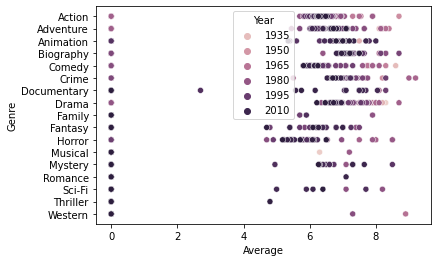

In [20]:
sns.scatterplot(x=Uitslag_Dataset["Average"], y=Uitslag_Dataset['Genre'], hue=Uitslag_Dataset['Year'])

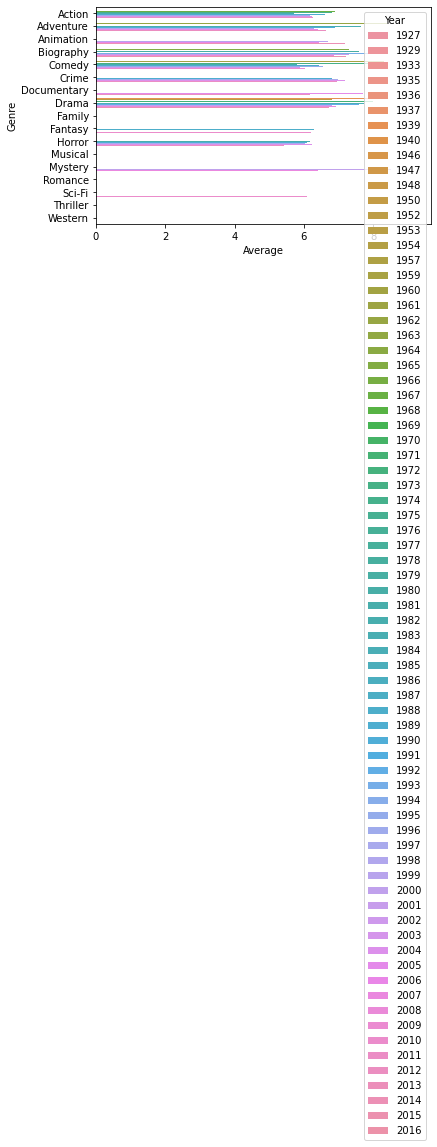

In [21]:
sns.barplot(x='Average', y='Genre', hue='Year', data=Uitslag_Dataset, saturation=0.8)

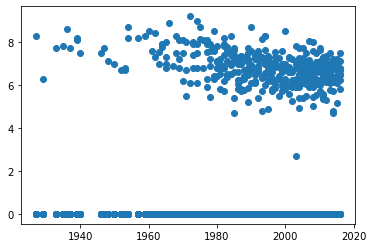

In [22]:
plt.scatter(Uitslag_Dataset['Year'], Uitslag_Dataset['Average'])

In [23]:
brush = alt.selection_interval()
points = alt.Chart(Uitslag_Dataset).mark_point().encode(x='Year:Q', y='Average:Q', color=alt.condition(brush, 'Genre:N', alt.value('lightgray'))).add_selection(brush)
bars = alt.Chart(Uitslag_Dataset).mark_bar().encode(y='Origin:N', color='Origin:Q', x='count(Origin):Q').transform_filter(brush)

In [24]:
points & bars

alt.VConcatChart(...)

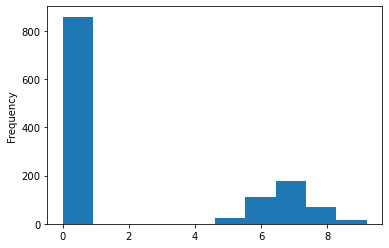

In [25]:
Uitslag_Dataset.Average.plot.hist()